In [1]:
from sklearn.datasets import make_classification
import numpy as np
X , y = make_classification(n_samples= 100 , n_features= 2, n_informative= 1, n_redundant= 0 , 
                           n_classes=2 , n_clusters_per_class= 1, random_state= 41 ,hypercube= False ,class_sep= 20 )

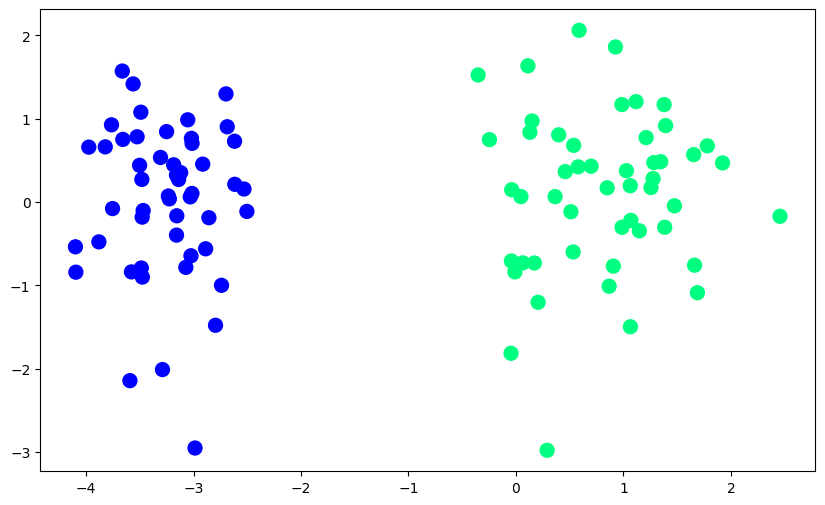

In [2]:
import matplotlib.pyplot as  plt 
plt.figure(figsize = (10,6))
plt.scatter(X[:,0],X[:,1],c = y ,cmap ='winter' , s =100)

In [3]:
def perceptron(X,y):
    X = np.insert(X,0,1,axis = 1) # adding a column of 1 in the matrix 
    weights = np.ones(X.shape[1]) # weights is an array of size of number of columns of X  , (3 is the size of array)
    lr =0.1

    for i in range(10000):
        j = np.random.randint(0,100) # selecting a random values from zero to 100
        y_hat = step(np.dot(X[j],weights)) # calcuating the y_pred at that index (by using the dot product ) 
        weights = weights +lr*(y[j] - y_hat)*X[j]

    return weights[0],weights[1:]

In [4]:
def perceptron1(X,y):
    X = np.insert(X,0,1,axis = 1) # adding a column of 1 in the matrix 
    weights = np.ones(X.shape[1]) # weights is an array of size of number of columns of X  , (3 is the size of array)
    lr =0.1

    for i in range(10000):
        j = np.random.randint(0,100) # selecting a random values from zero to 100
        y_hat = sigmoid(np.dot(X[j],weights)) # calcuating the y_pred at that index (by using the dot product ) 
        weights = weights +lr*(y[j] - y_hat)*X[j]

    return weights[0],weights[1:]

In [5]:
def step(z):
    return 1 if z > 0 else 0

In [6]:
def sigmoid(z):
    return 1 /(1+ np.exp(-z))

In [7]:
intercpet_ ,coef_   = perceptron1(X,y)

In [8]:
intercpet_ ,coef_

(4.907304672376924, array([4.23473567, 0.12389364]))

In [9]:
m = -(coef_[0]/coef_[1])
b =  -(intercpet_/coef_[1])

In [10]:
x_input = np.linspace(-3,3,100)
y_input =m*x_input + b

(-3.0, 2.0)

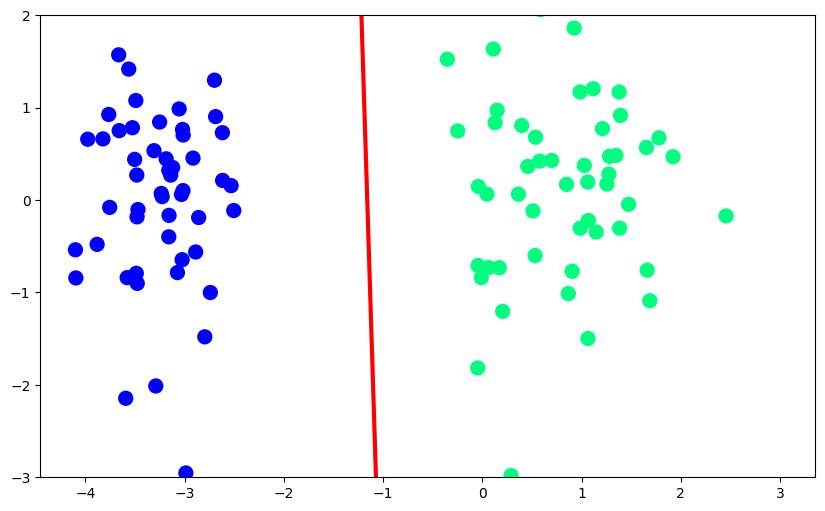

In [11]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color ='red',linewidth =3)
plt.scatter(X[:,0],X[:,1],c =y ,cmap = 'winter',s =100 )
plt.ylim(-3,2)

In [12]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [13]:
lor.coef_

array([[2.36679363, 0.02300492]])

In [14]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_ /lor.coef_[0][1])


In [15]:
x_input1 = np.linspace(-3,3,100)
y_input1= m*x_input + b


(-3.0, 2.0)

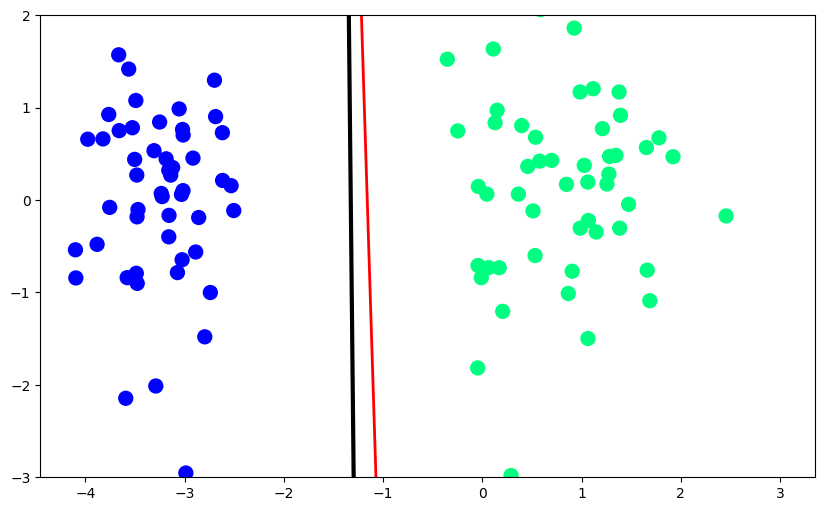

In [16]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color ='red',linewidth = 2)
plt.plot(x_input1,y_input1,color ='black',linewidth =3)

plt.scatter(X[:,0],X[:,1],c =y ,cmap = 'winter',s =100 )
plt.ylim(-3,2) 

the problem in the percpetron tric is that it will not improve the model after finding all the points is correct , but the skleearn imporves that model to reduce the error over the test data  

* now in the sklearn logice all the correctly classified points will push the data away from the points  
* all the incorrectly classified points will pull the line towards them sleves

### making the model as sklearn model

In [17]:
from sklearn.linear_model import  LogisticRegression
lor = LogisticRegression(penalty=None,solver = 'sag')
lor.fit(X,y)

/home/anubhav/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [18]:
lor.coef_

array([[4.89590576, 0.23502349]])

In [19]:
lor.intercept_

array([5.85018336])

In [20]:
m1 = -(lor.coef_[0][0]/ lor.coef_[0][1])

b1 = -(lor.intercept_/lor.coef_[0][1])



In [21]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m1*x_input + b1

In [22]:
def gd(X,y):
    X =np.insert(X,0,1,axis = 1)
    weights = np.ones(X.shape[1])
    lr = 0.5

    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y- y_hat),X)/X.shape[0])

    return weights[1:],weights[0]

In [23]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [24]:
coef_ ,intercept_ =gd(X,y)

In [25]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [26]:
x_input = np.linspace(-3,3,100)
y_inpu = m*x_input + b 

(-3.0, 2.0)

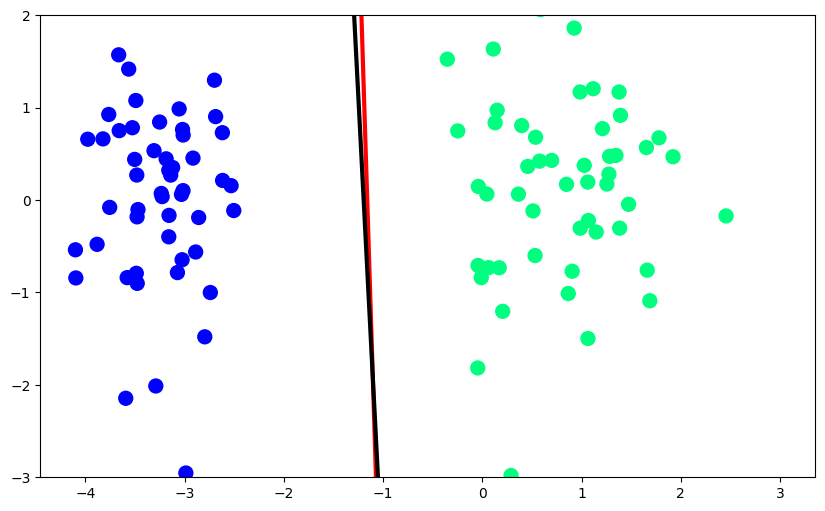

In [27]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth =3)
plt.plot(x_input1,y_input1,color='black',linewidth = 3)
plt.scatter(X[:,0],X[:,1],c = y ,cmap ='winter',s =100)
plt.ylim(-3,2)